In [4]:
import pandas as pd 
from glob import glob
import os

# Loading Data 

In [95]:
dir_ = os.getcwd()
#csv 확장자명을 가진 파일 모두 선택 
file_list = glob(dir_+'/detailed/*.csv')
file_list

['C:\\Users\\Ki_Yoon_Yoo\\Desktop\\ToBigs\\6주차\\크롤링\\과제/detailed\\2016_detailed.csv',
 'C:\\Users\\Ki_Yoon_Yoo\\Desktop\\ToBigs\\6주차\\크롤링\\과제/detailed\\2017_detailed.csv',
 'C:\\Users\\Ki_Yoon_Yoo\\Desktop\\ToBigs\\6주차\\크롤링\\과제/detailed\\2018_detailed.csv']

In [123]:
file_list = [2016,2017,2018]
df = pd.DataFrame()
for i in file_list:
    temp_df = pd.read_csv('detailed/'+str(i)+'_detailed.csv',encoding='utf8')
    df= df.append(temp_df)

In [124]:
df.head()

,title,netizen_grade,critic_grade,open_date,url,genere,audience_num,running_time,rated,director
0,부산행,7.3,7.1,16.07.20,/moviedb/main?movieId=87215,액션/스릴러,"11,566,874",118.0,15세이상관람가,연상호
1,검사외전,6.4,5.5,16.02.03,/moviedb/main?movieId=90378,범죄/코미디,"9,707,581",126.0,15세이상관람가,이일형
2,캡틴 아메리카: 시빌 워,8.1,7.4,16.04.27,/moviedb/main?movieId=89869,액션/SF/스릴러,"8,678,117",147.0,12세이상관람가,안소니 루소
3,밀정,7.7,7.4,16.09.07,/moviedb/main?movieId=95915,액션/시대극/스릴러,"7,500,457",140.0,15세이상관람가,김지운
4,터널,7.2,6.8,16.08.10,/moviedb/main?movieId=94333,드라마,"7,120,780",126.0,12세이상관람가,김성훈


### 날짜 변수 생성 & Null 값 제거 

In [125]:
def cleanse(df,label):
    #label 에 null 값이 존재한다면 bad_idx 에 index 저장 
    bad_idx = df.loc[df.isnull()[label]==True].index.tolist()
    df = df.drop(bad_idx)
    
    #날짜 변수 생성 
    df['open_date']=df['open_date'].apply(lambda x: ''.join(('20',str(x))))
    df['open_date'] = pd.to_datetime(df['open_date'],errors = 'ignore')
    df.loc[df['open_date']<'2017','year'] = '2016'
    df.loc[(df['open_date']> '2017') & (df['open_date']< '2018'),'year'] = '2017'
    df.loc[df['open_date']> '2018','year'] = '2018'
    return df 

In [129]:
df.isnull().any()

title            False
netizen_grade    False
critic_grade      True
open_date        False
url              False
genere           False
audience_num     False
running_time     False
rated            False
director         False
year             False
dtype: bool

In [126]:
df = cleanse(df,'netizen_grade')

### 영화 제목은 150개 모두 존재하지만 다른 항목들에서 Null 값이 존재합니다.
### 다음 영화 사이트 자체적으로 문제도 있지만 크롤링 과정에서 문제도 발생한 것으로 예상됩니다. 분석의 편의를 위해 네티즌평점에  Null 값이 존재하는 영화들을 모두 제거합니다.

### cleanse() 가 완료된 데이터는 평론가 평점 외에는 Null 값이 존재하지 않는 147개의 영화데이터셋입니다. 다음 영화에서 조회한 결과 본 영화들은 평론가 평점이 존재하지 않는 영화입니다. 

### 아울러, cleanse 함수를 통해 'year' 이라는 날짜 변수가 생성되었습니다.

In [128]:
len(df)

147

In [127]:
df.isnull().any()

title            False
netizen_grade    False
critic_grade      True
open_date        False
url              False
genere           False
audience_num     False
running_time     False
rated            False
director         False
year             False
dtype: bool

# 년도 별 분석

In [131]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#for using Korean font
matplotlib.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

In [172]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

def multi_comparison(response, group = 'year',data=df):
    sns.boxplot(x=group, y=response,data=data)
    sns.swarmplot(x=group, y=response,data=data,color='0.25')
    mc = MultiComparison(data[response], data[group])
    result = mc.tukeyhsd()
    print(result)



### alpha = 0.05 에서 3개 년도의 네티즌 평점은 유의미한 차이를 보이지 않는다.

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
 2016   2017   0.138   -0.3011 0.5771 False 
 2016   2018  -0.0917  -0.5377 0.3543 False 
 2017   2018  -0.2297  -0.6757 0.2163 False 
--------------------------------------------


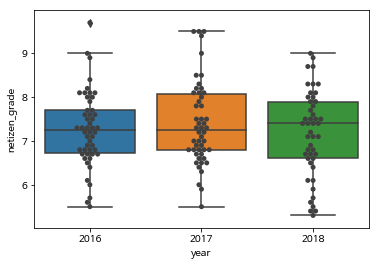

In [173]:
multi_comparison('netizen_grade')

### 평론가 평점 역시 유의미한 차이를 보이지 않는다. 

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff lower upper reject
-----------------------------------------
 2016   2017    nan     nan   nan  False 
 2016   2018    nan     nan   nan  False 
 2017   2018  -0.1917   nan   nan  False 
-----------------------------------------


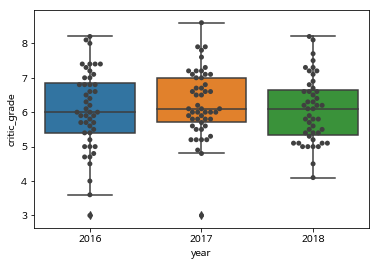

In [174]:
multi_comparison('critic_grade')

### 흥미롭게도 박스오피스 50위권 영화에 대한 네티즌 평점, 평론가 평점, 그리고 네트즌과 평론가의 의견차이가 해마다 동일한 평균을 갖는다는 결론이 나왔다.

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff lower upper reject
-----------------------------------------
 2016   2017    nan     nan   nan  False 
 2016   2018    nan     nan   nan  False 
 2017   2018   0.038    nan   nan  False 
-----------------------------------------


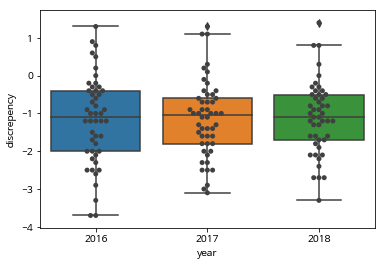

In [175]:
multi_comparison('discrepency')

In [166]:
df['audience_num'] = df['audience_num'].apply(lambda x: int(x.replace(',','')))

     Multiple Comparison of Means - Tukey HSD,FWER=0.05    
group1 group2   meandiff      lower        upper     reject
-----------------------------------------------------------
 2016   2017   263329.38  -1045902.2457 1572561.0057 False 
 2016   2018  -228403.314 -1558362.8504 1101556.2223 False 
 2017   2018  -491732.694 -1821692.2304 838226.8423  False 
-----------------------------------------------------------


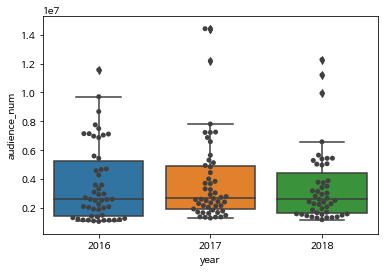

In [176]:
multi_comparison('audience_num')

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
 2016   2017   -1.28   -8.5827 6.0227 False 
 2016   2018  -3.2617   -10.68 4.1566 False 
 2017   2018  -1.9817    -9.4  5.4366 False 
--------------------------------------------


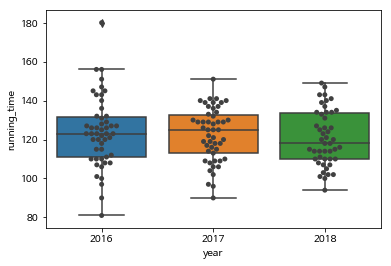

In [178]:
multi_comparison('running_time')

# Audience_num 분석 :
## 흥행 성공의 지표인 누적 관객수가 어떤 변수에 의해서 결정되는지 살펴봅니다.

In [180]:
corr_mtx = df.corr()
corr_mtx['audience_num'].sort_values(ascending = False)

audience_num     1.000000
running_time     0.371934
critic_grade     0.158816
netizen_grade    0.148598
discrepency      0.021055
Name: audience_num, dtype: float64

In [194]:
col_list= df.select_dtypes(exclude='object').columns.tolist()
col_list.remove('audience_num')
col_list.remove('open_date')

In [199]:
X = df[col_list]
y = df['audience_num']

In [201]:
import numpy as np
np.isnan(X).any()

netizen_grade    False
critic_grade      True
running_time     False
discrepency       True
dtype: bool

In [206]:
np.isnan(y).any()
#y 는 모두 존재 

False

### 앞서 전처리 단계에서 netizen_grade 에서 Null 값을 가지는 데이터를 지웠지만 critic_grade - 따라서 discrepency 가 없는 데이터도 존재합니다. 이를 median 값으로 채웁시다. 

In [205]:
bad_idx = np.where(np.isnan(X))
bad_idx

(array([33, 33, 47, 47], dtype=int64), array([1, 3, 1, 3], dtype=int64))

In [208]:
X = X.fillna(X.median())

In [224]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor as DT

reg = DT(max_depth =3)
reg.fit(X,y)


DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [223]:
pd.DataFrame(data=reg.feature_importances_.reshape(-1,4),columns=X.columns)

,netizen_grade,critic_grade,running_time,discrepency
0,0.0,0.401866,0.598134,0.0


### 예상외의 결과입니다. DT의 feature importance 에 의하면 running_time 이 누적관객을 예측하는데 가장 중요한 변수라고 합니다.

### 모델의 성능은?

In [231]:
print('R-sqaured : {0:1f}'.format(reg.score(X,y)))

R-sqaured : 0.332738


### 모델 튜닝을 통해 성능을 높인뒤, 다시 feature importance 를 봅니다.

In [240]:
from __future__ import print_function
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from datetime import datetime

In [242]:
from sklearn.metrics import * 

In [243]:
tuned_parameters = [{'max_depth':[1,3,5,7,9]}]

In [252]:
#function for gridsearch
def grid_search(X,y,reg_type = reg,scores=['explained_variance','neg_mean_absolute_error','r2'],tuned_parameters=tuned_parameters):
    start_time = datetime.now()

    #Reference : Sci-kit documentation
    #위 레퍼런스와 stackoverflow를 참고했습니다.

    for score in scores:
        print("# Tuning hyper-parameters for %s" % score)
        print()

        reg = GridSearchCV(reg_type, tuned_parameters, cv=5, n_jobs=4,
                           scoring='%s' % score)
        reg.fit(X, y)

        print("Best parameters set found on development set:")
        print()
        print(reg.best_params_)



    end_time = datetime.now()
    print('\n\n\nDuration:{}'.format(end_time-start_time))

In [253]:
grid_search(X,y, reg)

# Tuning hyper-parameters for explained_variance

Best parameters set found on development set:

{'max_depth': 1}
# Tuning hyper-parameters for neg_mean_absolute_error

Best parameters set found on development set:

{'max_depth': 1}
# Tuning hyper-parameters for r2

Best parameters set found on development set:

{'max_depth': 5}



Duration:0:00:00.182512


C:\ProgramData\Miniconda3\envs\ml\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\ProgramData\Miniconda3\envs\ml\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\ProgramData\Miniconda3\envs\ml\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### R-squared 값이 가장 높은 max_depth = 5 를 사용하여 다시  feature importance 를 구합니다

In [254]:
reg = DT(max_depth=5)
reg.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [255]:
pd.DataFrame(data=reg.feature_importances_.reshape(-1,4),columns=X.columns)

,netizen_grade,critic_grade,running_time,discrepency
0,0.059037,0.230249,0.573884,0.13683


In [259]:
y_pred = reg.predict(X)
print(int(mean_absolute_error(y,y_pred))/y.mean())

0.31227160148576816